<a href="https://colab.research.google.com/github/C-Designer/Study/blob/main/n134-clustering/n134a-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Dataset prepare

아래의 주소를 참조하여, 데이터를 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>
- "diagnosis"에 있는 label 데이터를 따로 변수로 생성하세요.
- 이후 해당 column을 제거한 나머지 데이터를 사용하여 k-means clustering을 하며 k = 2를 제외한 다른 parameter는 default option을 사용합니다.

In [99]:
from scipy.spatial.distance import cdist as cd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 결측값, diag 제거
df= pd.read_csv('/content/drive/MyDrive/Data Storage/CodeStates/[n134]/data.csv').drop('diagnosis', 1)
df= df.fillna(0).iloc[:, :-1]
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [100]:
# 인코딩 및 컬럼명, 설정값 변경
diag= pd.read_csv('/content/drive/MyDrive/Data Storage/CodeStates/[n134]/data.csv')['diagnosis']
diag = pd.get_dummies(diag, drop_first=True)
diag.columns = ['diagnosis']
diag

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [101]:
km = KMeans(n_clusters= 2).fit(df)
labels = km.labels_

df['clusters'] = pd.Series(labels).values
df['clusters'] = df['clusters'].replace({1:0, 0:1})
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


2. 

- 원래 라벨과, clustering 이후의 라벨을 비교하여 accuracy를 측정하세요. 

- accuracy = 전체데이터중에 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = (2 + 2) / 6



In [102]:
accuracy_score(df['clusters'], diag)

0.37434094903339193

# 2. Data pre-process 후 clustering을 시행해보세요

- 각 Feature별로 Scale 조절을 위해 데이터 정규화를 하세요.
- 이후 PCA를 시행하세요.
- scree plot을 통해 90%의 variation을 설명하기 위해 사용되는 PC의 수를 확인해보세요.
- PC1과 PC2만 사용하여 clustering 후 scatter plot을 그려보세요.




In [103]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize= [10, 5])
    plt.grid(axis= 'y')

    plt.xlabel("PC", fontsize= 20)
    plt.ylabel("Variance", fontsize= 20)
    plt.title('Scree plot', fontsize= 20)
    plt.plot(vals, c='black',marker= '.') # Bar plot
    
    sum, count = 0, 0
    for i in vals:
      sum += i
      count += 1
      print(f'{count}개: {sum * 100:.2f}%')

In [104]:
# 데이터 정규화
MM = MinMaxScaler().fit_transform(df)

columns = df.columns
pca_df = pd.DataFrame(MM, columns= columns)

In [105]:
# PCA
pca = PCA(n_components= len(pca_df.columns))
pc = pca.fit_transform(pca_df)

pc_df = pd.DataFrame(data = pc, columns= columns)
pc_df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,1.385657,0.431723,-0.505182,0.205755,0.012746,-0.074356,0.187792,0.236847,-0.029002,0.116397,0.130419,0.096480,0.030446,-0.041663,-0.125981,-0.136981,0.005087,-0.036895,0.033209,-0.062072,-0.029922,-0.038192,-0.007417,-0.008981,0.006949,0.002390,0.020339,-0.004879,-0.041322,-0.004226,0.006284,-0.007835
1,0.461597,-0.552519,-0.224961,0.000645,-0.005906,0.014502,0.011153,0.043363,0.021550,-0.100165,-0.054673,0.074325,-0.132797,0.166493,-0.054972,0.066177,-0.052247,-0.001611,-0.031286,0.039988,-0.002543,0.015214,0.010468,-0.015095,-0.013982,-0.038000,0.009915,0.008156,0.016204,0.004260,-0.000410,-0.000288
2,0.955182,-0.109379,-0.137400,0.048985,0.021797,-0.033884,0.070259,-0.108280,-0.002124,-0.078217,-0.055289,0.035033,0.062484,0.012287,-0.022578,0.043272,0.082577,-0.028520,0.017391,0.017206,0.049625,-0.009319,0.040090,0.031270,0.002454,0.008878,-0.013117,0.022313,0.007565,0.004664,0.000659,-0.000122
3,1.000648,1.523350,-0.065715,-0.115314,0.169683,-0.218383,0.397646,0.191185,0.162481,0.114852,-0.174717,0.133957,0.209885,0.128220,-0.026530,0.016621,0.021204,0.030677,0.029749,0.001682,0.087533,-0.022600,0.032251,0.036955,0.008983,-0.041229,0.016315,0.053489,0.014547,0.003950,-0.010373,-0.003602
4,0.627593,-0.302923,-0.322424,0.343920,-0.043215,-0.000676,-0.155535,-0.062948,0.043389,-0.000979,-0.001083,-0.127863,-0.071568,0.031014,-0.057901,0.040785,-0.020689,0.045551,0.017103,-0.047931,-0.020529,0.000726,0.019055,0.059164,-0.007437,0.006250,0.011915,-0.006862,0.009359,-0.005042,0.000202,0.003218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.002123,-0.471291,-0.052442,0.233655,-0.158480,-0.084759,-0.318115,-0.127887,-0.004178,-0.086557,0.120758,-0.044262,0.041332,0.032489,-0.042297,0.070344,0.061783,0.001416,0.053104,0.026139,0.042567,0.015724,-0.011950,-0.006006,0.013890,0.004205,0.013673,0.035702,0.015747,-0.000079,0.001353,-0.000190
565,0.620115,-0.514166,0.378598,-0.033148,-0.233364,-0.099074,-0.064391,-0.078575,-0.096664,0.046475,0.002007,0.047121,-0.025154,0.041131,0.034573,0.015943,-0.005372,-0.002114,0.033881,0.035420,0.026052,-0.000190,-0.017800,0.001777,-0.007140,-0.001811,-0.016438,-0.004161,-0.003672,-0.003438,-0.004443,-0.001680
566,0.225643,-0.285548,0.269991,-0.145129,-0.087747,0.216471,-0.084622,-0.030684,0.008756,-0.128988,-0.041638,-0.020073,0.056144,-0.042958,0.027066,0.033171,-0.014232,-0.015274,-0.011908,0.023959,-0.001474,-0.006322,-0.015867,-0.010283,0.012933,-0.009302,-0.005007,-0.007466,-0.002176,-0.000074,0.001067,0.000727
567,1.676507,0.340548,0.217499,-0.263322,-0.028112,0.066635,0.100977,0.071073,-0.079277,0.094959,-0.027012,-0.127027,-0.016942,-0.151783,-0.016146,0.009645,-0.013211,-0.020882,0.022920,-0.060608,0.007181,0.009601,0.002221,-0.021203,0.062402,0.020352,0.022838,0.010861,-0.006378,-0.008172,-0.013448,-0.003840


1개: 50.08%
2개: 66.42%
3개: 73.23%
4개: 79.56%
5개: 84.84%
6개: 88.69%
7개: 91.56%
8개: 93.05%
9개: 94.14%
10개: 95.06%
11개: 95.94%
12개: 96.74%
13개: 97.46%
14개: 98.08%
15개: 98.53%
16개: 98.78%
17개: 99.02%
18개: 99.20%
19개: 99.34%
20개: 99.47%
21개: 99.57%
22개: 99.66%
23개: 99.74%
24개: 99.80%
25개: 99.85%
26개: 99.90%
27개: 99.94%
28개: 99.97%
29개: 99.99%
30개: 100.00%
31개: 100.00%
32개: 100.00%


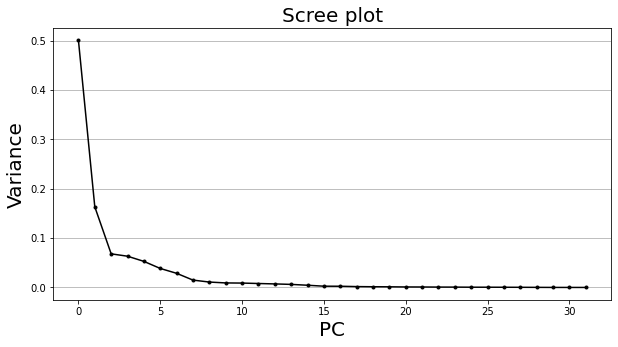

In [106]:
scree_plot(pca)   # 6개부터 90%의 variation을 충족한다.

In [107]:
# PC 2개
pca2 = PCA(n_components= 2)
pc2 = pca2.fit_transform(pca_df)

pc_df2 = pd.DataFrame(data = pc2, columns= ['PC1', 'PC2'])
pc_df2['diagnosis'] = diag
pc_df2

,PC1,PC2,diagnosis
0,1.385657,0.431723,1
1,0.461597,-0.552519,1
2,0.955182,-0.109379,1
3,1.000648,1.523350,1
4,0.627593,-0.302923,1
...,...,...,...
564,1.002123,-0.471291,1
565,0.620115,-0.514166,1
566,0.225643,-0.285548,1
567,1.676507,0.340548,1


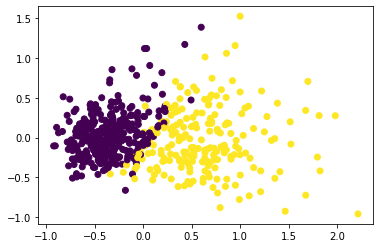

In [109]:
plt.scatter(pc_df2['PC1'], pc_df2['PC2'], c= pc_df2['diagnosis'])

# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>
